In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Seaborn -> under hood matplotlib
# Matplotlib lowlevel

<Axes: >

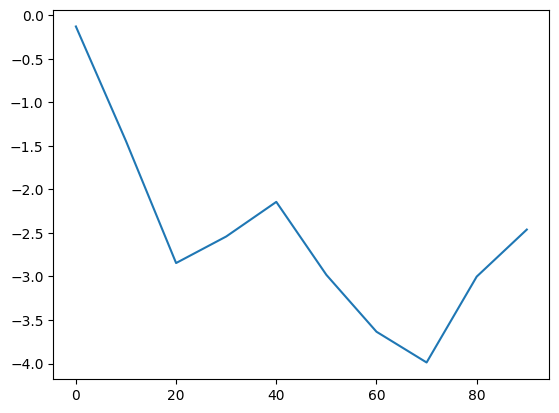

In [3]:
# series and df plot func, default line
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

# index on x axis, disabe with use_index=False


<Axes: >

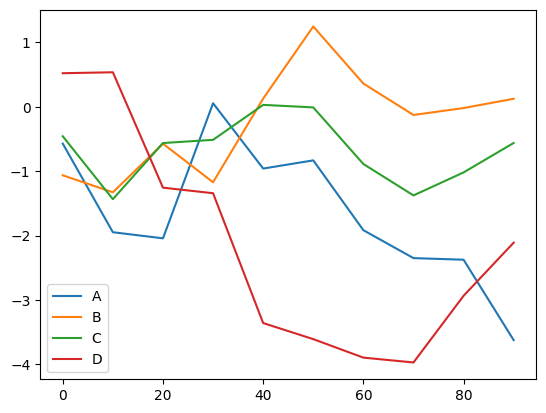

In [4]:
# each col plotted
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
        columns=['A', 'B', 'C', 'D'],
        index=np.arange(0, 100, 10))
df.plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

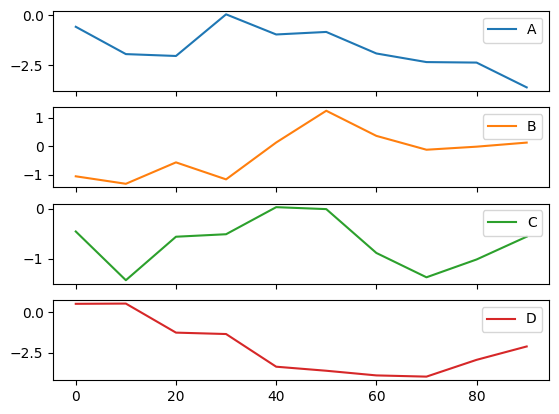

In [5]:
df.plot(subplots=True)

<Axes: >

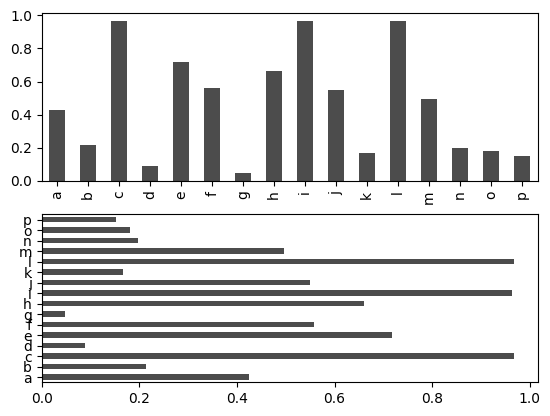

In [6]:
# Bar with df.plot.bar()
# df index as xticks and y(barh ticks) , ax param to specify ax obj to plot on

# Series
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [7]:
# df: bar plots group the values in each row together in a group in bars
df = pd.DataFrame(np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.156918,0.106745,0.589227,0.704298
two,0.789886,0.475152,0.690497,0.949474
three,0.950644,0.091994,0.704838,0.893592
four,0.494368,0.231059,0.249090,0.552453
five,0.213065,0.306177,0.207084,0.180423
six,0.946456,0.611853,0.839684,0.408815


<Axes: >

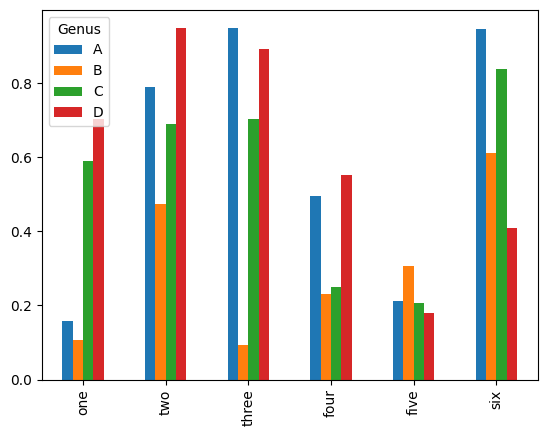

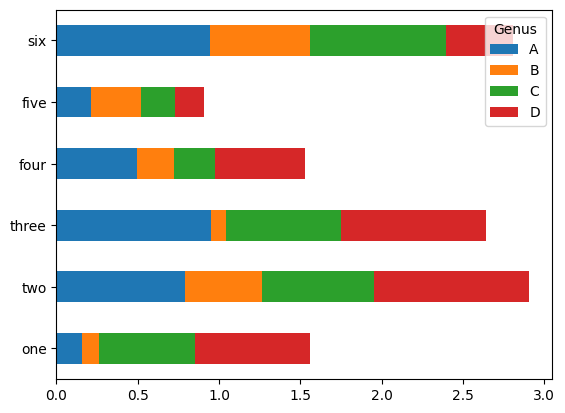

In [8]:
df.plot.bar() 
df.plot.barh(stacked=True)

In [9]:
# data.value_counts().plot().bar()

In [10]:
tips = pd.read_csv("../examples/tips.csv")
# freq chart for day(row) , size
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [11]:
# remove c1,c6
party_counts = party_counts.iloc[:,1:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [12]:
# normalise row sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0) # div does flkoating point division
party_pcts


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<Axes: xlabel='day'>

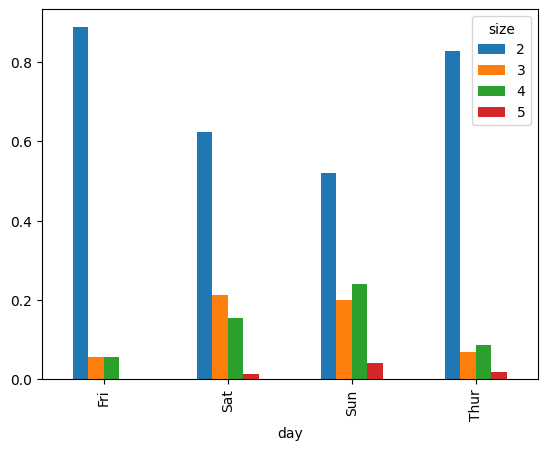

In [13]:
party_pcts.plot.bar()

### Seaborn when summarisation data before plot

In [14]:

import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

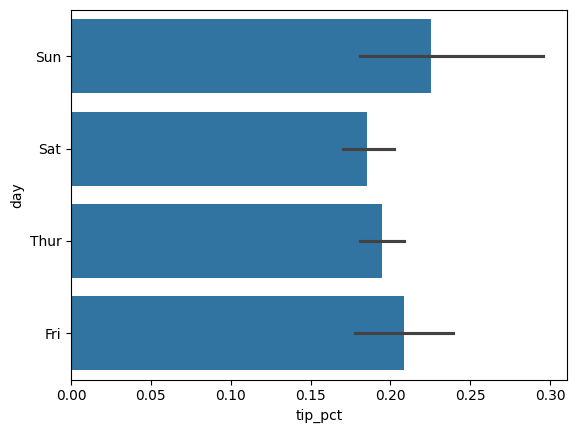

In [15]:
# seaborn takes data arg
sns.barplot(x='tip_pct', y='day',data=tips, orient='h')

<Axes: xlabel='tip_pct', ylabel='day'>

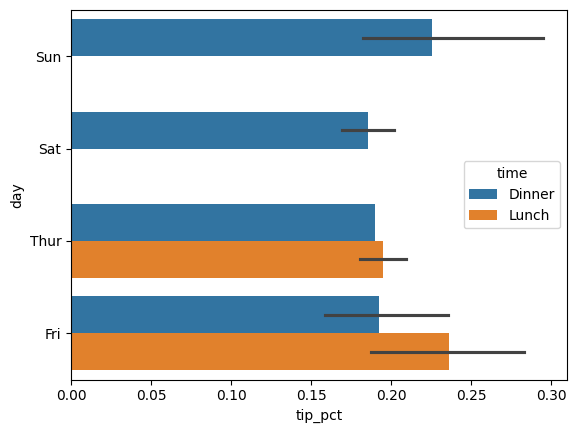

In [16]:
# hue to split over other col
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<Axes: ylabel='Frequency'>

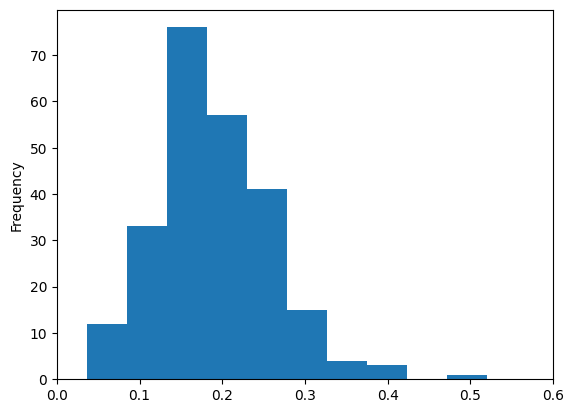

In [17]:
# histogram
tips['tip_pct'].plot.hist(bins=50, xlim=(0,.6))


<Axes: ylabel='Density'>

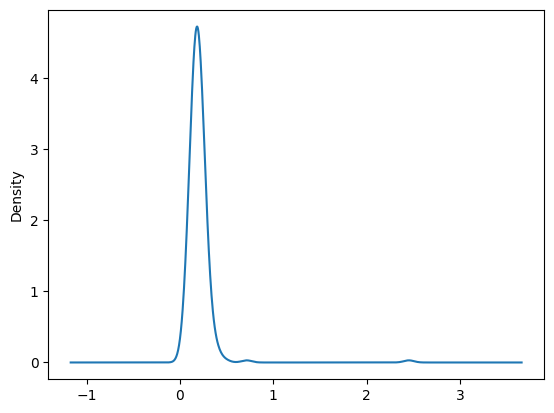

In [18]:
# density plot
tips['tip_pct'].plot.density()

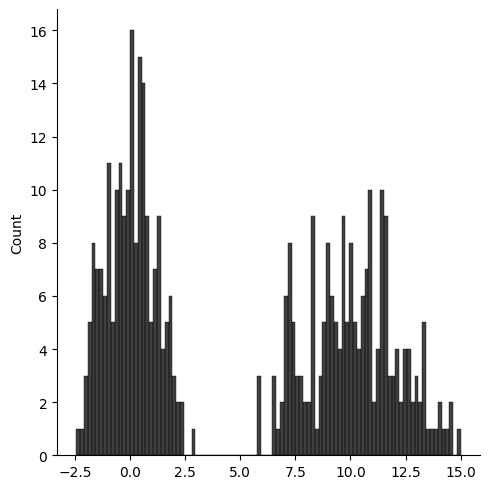

In [19]:
# seaborn's distplot both histogram and density plot
d1 = np.random.normal(0,1,200)
d2 = np.random.normal(10,2,200)
vals = pd.Series(np.concatenate([d1,d2]))
vals
sns.displot(vals, bins=100,color='k')

### Scatter plot

In [20]:
# for relation between 2 1-D series
macro = pd.read_csv("../examples/macrodata.csv")
data = macro[["cpi" , "m1" , "tbilrate" , "unemp"]]
trans_data = np.log(data).diff().dropna() #diff : row diff with prev row
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

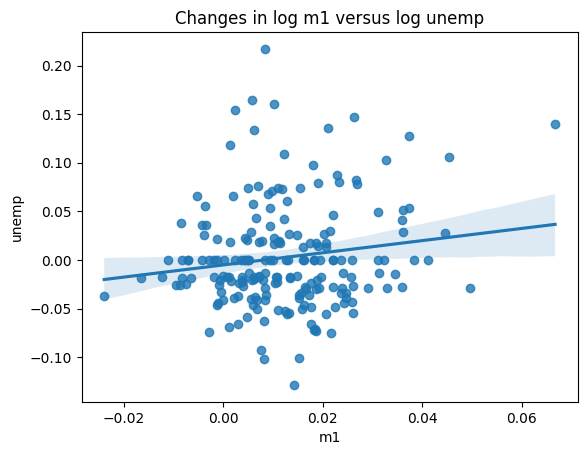

In [21]:
# regplot -> scatterplot + regression line
sns.regplot(x='m1', y='unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

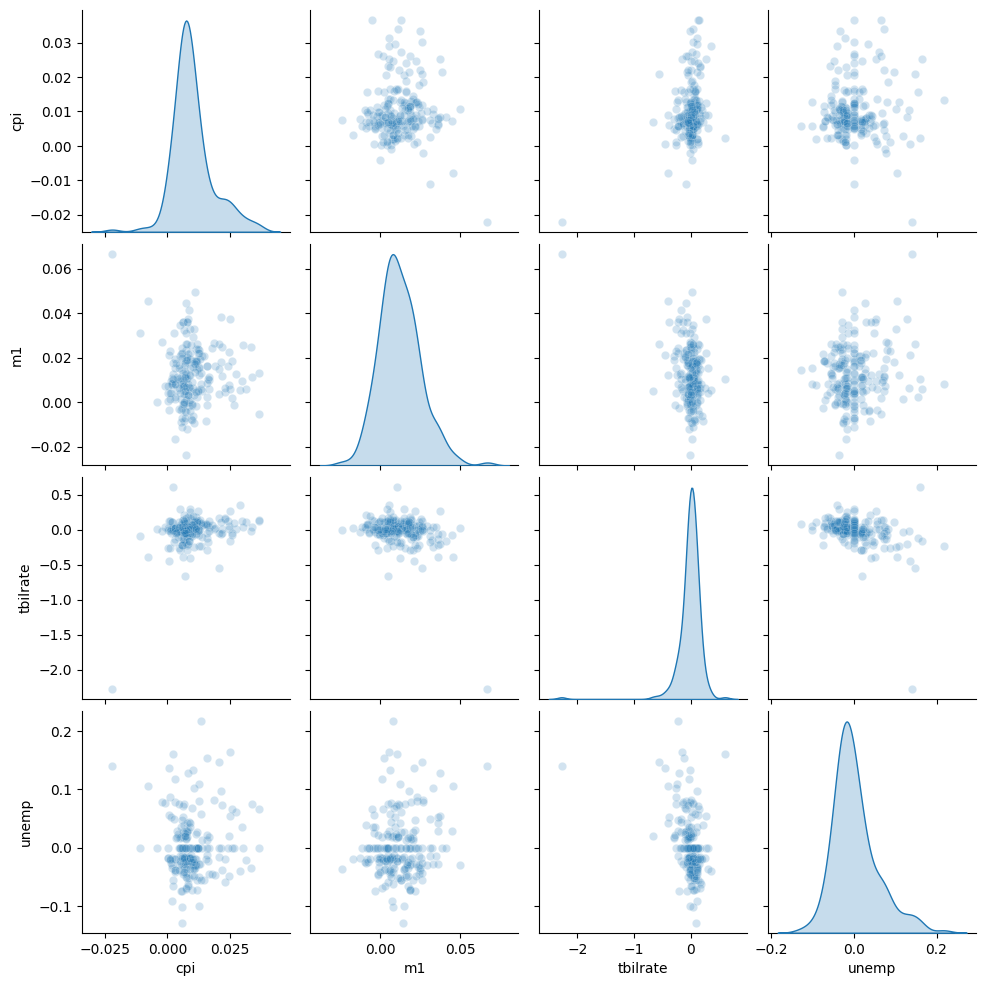

In [22]:
# EDA  -> good to see pair of vars scatter -> scatter plot matrix
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha' : .2})